In [1]:
#	EDA process, 
#	Data Cleaning,
#	Feature Selection
#	Dealing with Duplicates

In [2]:
#Importing libraries

import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt


In [3]:
#Importing the file

df=pd.read_csv("Salary_Survey.csv")

In [4]:
#Checking the shape of the file; how many observations and features to have an idea of the size of it.

df.shape

(28178, 23)

In [5]:
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",...,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#The features titles are long so I will double check the names to see any hidden characters on it.
    
print(df.columns)

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [7]:
#Marking corrupt values as missing to standa

missing_values=["n.a.","?","NA","n/a", "na", "--",'nan']
df = pd.read_csv("Salary_Survey.csv",na_values = missing_values)

In [8]:
#Rename the features to make the data easier to read and work with.

df=df.rename(columns={"How old are you?":"Age",'Job title':"Job_title","What industry do you work in?":"Industry",'If your job title needs additional context, please clarify here:':"Job_title_context","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":"Annual_Salary",'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.':"Monetary_Compensation","Please indicate the currency":"Currency",'If "Other," please indicate the currency here: ':"Other_currencies",'If your income needs additional context, please provide it here:':"Income_context", 'What country do you work in?':"Country_of_work","If you're in the U.S., what state do you work in?":"US_State",'What city do you work in?':"City_of_work","How many years of professional work experience do you have overall?":"Overral_experience",'How many years of professional work experience do you have in your field?':"Field_experience",'What is your highest level of education completed?':"Education",'What is your gender?':"Gender"})

In [9]:
#Checkinf the type of data is there.

df.dtypes

##Some features that should be numerical came up as object, which could be because of malformed values, but before fixing that I will rename the features as they are too long.

Timestamp                 object
Age                       object
Industry                  object
Job_title                 object
Job_title_context         object
Annual_Salary             object
Monetary_Compensation    float64
Currency                  object
Other_currencies          object
Income_context            object
Country_of_work           object
US_State                  object
City_of_work              object
Overral_experience        object
Field_experience          object
Education                 object
Gender                    object
Unnamed: 17              float64
Unnamed: 18              float64
Unnamed: 19              float64
Unnamed: 20              float64
Unnamed: 21              float64
Unnamed: 22              float64
dtype: object

In [10]:
#Checking info to see non null values and how much information we have in each feature.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28178 entries, 0 to 28177
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              28085 non-null  object 
 1   Age                    28085 non-null  object 
 2   Industry               28011 non-null  object 
 3   Job_title              28083 non-null  object 
 4   Job_title_context      7266 non-null   object 
 5   Annual_Salary          28085 non-null  object 
 6   Monetary_Compensation  20780 non-null  float64
 7   Currency               28085 non-null  object 
 8   Other_currencies       206 non-null    object 
 9   Income_context         3043 non-null   object 
 10  Country_of_work        28084 non-null  object 
 11  US_State               23059 non-null  object 
 12  City_of_work           27994 non-null  object 
 13  Overral_experience     28085 non-null  object 
 14  Field_experience       28085 non-null  object 
 15  Ed

In [11]:
import seaborn as sns

<Axes: >

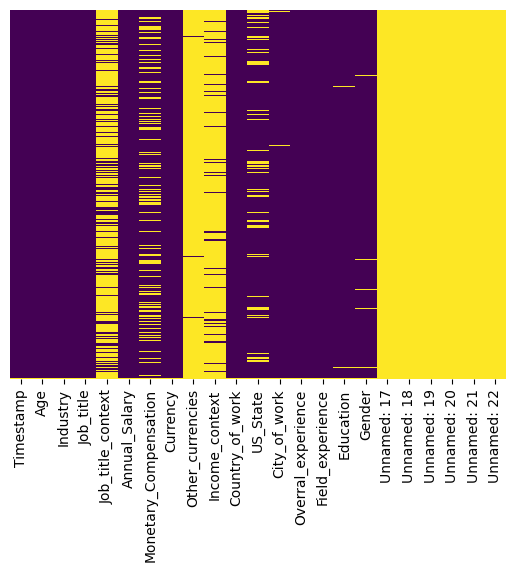

In [12]:
#HeatMap for better visualization of null values

sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

#Job title context, other currencies and income context have very little values, most are null, and unnamed 17 to 22 are completed empty so I will drop those features.

In [13]:
#Checking all the empty values

df.isnull().sum()

Timestamp                   93
Age                         93
Industry                   167
Job_title                   95
Job_title_context        20912
Annual_Salary               93
Monetary_Compensation     7398
Currency                    93
Other_currencies         27972
Income_context           25135
Country_of_work             94
US_State                  5119
City_of_work               184
Overral_experience          93
Field_experience            93
Education                  315
Gender                     264
Unnamed: 17              28178
Unnamed: 18              28178
Unnamed: 19              28178
Unnamed: 20              28178
Unnamed: 21              28178
Unnamed: 22              28178
dtype: int64

In [14]:
#Drop empty columns

df= df.dropna(axis = 1, how ='all')

In [15]:
#Drop the rows with all NaN values

df = df.dropna(axis = 0, how ='all')
df

,Timestamp,Age,Industry,Job_title,Job_title_context,Annual_Salary,Monetary_Compensation,Currency,Other_currencies,Income_context,Country_of_work,US_State,City_of_work,Overral_experience,Field_experience,Education,Gender
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28080,9/25/2024 19:54:18,45-54,"Accounting, Banking & Finance",Product Manager Lead,NaN,117000,8000.0,USD,NaN,NaN,USA,Missouri,Remote,11 - 20 years,11 - 20 years,College degree,Woman
28081,9/25/2024 21:34:43,45-54,Education (Primary/Secondary),Curriculum Writer,I am a freelance contract curriculum writer fo...,70000,0.0,USD,NaN,NaN,United States,South Carolina,Bennettsville,21 - 30 years,21 - 30 years,Master's degree,Woman
28082,9/30/2024 10:52:30,55-64,Government and Public Administration,Clerical Officer,NaN,28600,NaN,EUR,NaN,NaN,Ireland,NaN,Dublin,21 - 30 years,1 year or less,"Professional degree (MD, JD, etc.)",Man
28083,10/4/2024 13:05:24,18-24,Computing or Tech,Software Engineering Co-Op,I was an Intern,56160,0.0,USD,NaN,NaN,United States,Rhode Island,Jhonston,1 year or less,1 year or less,College degree,Man


In [16]:
#Check for duplicates

df.duplicated().sum()

0

In [17]:
#sns.boxplot(data=df, x="Annual_Salary")

#Annual Salary should have broken values because we cant see the values on the graph

In [18]:
df.describe()

,Monetary_Compensation
count,2.078000e+04
mean,1.815342e+04
std,8.337722e+05
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+03
75%,1.000000e+04
max,1.200000e+08


In [19]:
#Remove spaces from observations of features that seems important to my analysis

df['Annual_Salary'] = df['Annual_Salary'].str.replace(' ', '')

In [20]:
#Remove spaces from observations

df['Gender'] = df['Gender'].str.replace(' ', '')

In [21]:
#Remove spaces from observations

df['Currency'] = df['Currency'].str.replace(' ', '')

In [22]:
#Checking for malformed values on the observations so we can identify inconsistencies and standardize

df['Annual_Salary'].unique()

array(['55,000', '54,600', '34,000', ..., '7000', '37741', '53060'],
      dtype=object)

In [23]:
df['Age'].unique()
#change <18, 65>

array(['25-34', '45-54', '35-44', '18-24', '65 or over', '55-64',
       'under 18'], dtype=object)

In [24]:
df['Industry'].unique()

array(['Education (Higher Education)', 'Computing or Tech',
       'Accounting, Banking & Finance', ..., 'Student ', 'Wine & Spirits',
       'Social networks'], dtype=object)

In [25]:
df['Job_title'].unique()

array(['Research and Instruction Librarian',
       'Change & Internal Communications Manager', 'Marketing Specialist',
       ..., 'Curriculum Writer', 'Software Engineering Co-Op',
       'Content creator'], dtype=object)

In [26]:
df['Currency'].unique()


array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

In [27]:
df['Field_experience'].unique()
#drop years, <1 and 41>

array(['5-7 years', '2 - 4 years', '21 - 30 years', '11 - 20 years',
       '1 year or less', '8 - 10 years', '31 - 40 years',
       '41 years or more'], dtype=object)

In [28]:
df['Education'].unique()
#need to fix : college degree/high school

array(["Master's degree", 'College degree', 'PhD', nan, 'Some college',
       'High School', 'Professional degree (MD, JD, etc.)'], dtype=object)

In [29]:
df['Gender'].unique()
#need to fix

array(['Woman', 'Non-binary', 'Man', nan, 'Otherorprefernottoanswer',
       'Prefernottoanswer'], dtype=object)

In [30]:
#Renaming again after reading the file with the missing values to nan.

df=df.rename(columns={"How old are you?":"Age",'Job title':"Job_title","What industry do you work in?":"Industry",'If your job title needs additional context, please clarify here:':"Job_title_context","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":"Annual_Salary",'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.':"Monetary_Compensation","Please indicate the currency":"Currency",'If "Other," please indicate the currency here: ':"Other_currencies",'If your income needs additional context, please provide it here:':"Income_context", 'What country do you work in?':"Country_of_work","If you're in the U.S., what state do you work in?":"US_State",'What city do you work in?':"City_of_work","How many years of professional work experience do you have overall?":"Overral_experience",'How many years of professional work experience do you have in your field?':"Field_experience",'What is your highest level of education completed?':"Education",'What is your gender?':"Gender"})

In [31]:
#Checking on missing values
df.isnull().sum()

Timestamp                    0
Age                          0
Industry                    74
Job_title                    2
Job_title_context        20819
Annual_Salary                0
Monetary_Compensation     7305
Currency                     0
Other_currencies         27879
Income_context           25042
Country_of_work              1
US_State                  5026
City_of_work                91
Overral_experience           0
Field_experience             0
Education                  222
Gender                     171
dtype: int64

In [32]:
#Checking if Annual Salary changed to numerical

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28085 entries, 0 to 28084
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              28085 non-null  object 
 1   Age                    28085 non-null  object 
 2   Industry               28011 non-null  object 
 3   Job_title              28083 non-null  object 
 4   Job_title_context      7266 non-null   object 
 5   Annual_Salary          28085 non-null  object 
 6   Monetary_Compensation  20780 non-null  float64
 7   Currency               28085 non-null  object 
 8   Other_currencies       206 non-null    object 
 9   Income_context         3043 non-null   object 
 10  Country_of_work        28084 non-null  object 
 11  US_State               23059 non-null  object 
 12  City_of_work           27994 non-null  object 
 13  Overral_experience     28085 non-null  object 
 14  Field_experience       28085 non-null  object 
 15  Educati

In [33]:
#Trying to drop commas and spaces from Salary to change it to numerical

df['Annual_Salary']= df['Annual_Salary'].replace(',','', regex=True,)

#https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

In [34]:
#Changing Annual_Salary feature to numerical

df[["Annual_Salary"]] = df[["Annual_Salary"]].apply(pd.to_numeric)

#https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

In [35]:
#Checking if it worked

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28085 entries, 0 to 28084
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              28085 non-null  object 
 1   Age                    28085 non-null  object 
 2   Industry               28011 non-null  object 
 3   Job_title              28083 non-null  object 
 4   Job_title_context      7266 non-null   object 
 5   Annual_Salary          28085 non-null  int64  
 6   Monetary_Compensation  20780 non-null  float64
 7   Currency               28085 non-null  object 
 8   Other_currencies       206 non-null    object 
 9   Income_context         3043 non-null   object 
 10  Country_of_work        28084 non-null  object 
 11  US_State               23059 non-null  object 
 12  City_of_work           27994 non-null  object 
 13  Overral_experience     28085 non-null  object 
 14  Field_experience       28085 non-null  object 
 15  Educati

In [36]:
#Check head and tail for overview

df.head()

,Timestamp,Age,Industry,Job_title,Job_title_context,Annual_Salary,Monetary_Compensation,Currency,Other_currencies,Income_context,Country_of_work,US_State,City_of_work,Overral_experience,Field_experience,Education,Gender
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman


In [37]:
df.tail()

,Timestamp,Age,Industry,Job_title,Job_title_context,Annual_Salary,Monetary_Compensation,Currency,Other_currencies,Income_context,Country_of_work,US_State,City_of_work,Overral_experience,Field_experience,Education,Gender
28080,9/25/2024 19:54:18,45-54,"Accounting, Banking & Finance",Product Manager Lead,NaN,117000,8000.0,USD,NaN,NaN,USA,Missouri,Remote,11 - 20 years,11 - 20 years,College degree,Woman
28081,9/25/2024 21:34:43,45-54,Education (Primary/Secondary),Curriculum Writer,I am a freelance contract curriculum writer fo...,70000,0.0,USD,NaN,NaN,United States,South Carolina,Bennettsville,21 - 30 years,21 - 30 years,Master's degree,Woman
28082,9/30/2024 10:52:30,55-64,Government and Public Administration,Clerical Officer,NaN,28600,NaN,EUR,NaN,NaN,Ireland,NaN,Dublin,21 - 30 years,1 year or less,"Professional degree (MD, JD, etc.)",Man
28083,10/4/2024 13:05:24,18-24,Computing or Tech,Software Engineering Co-Op,I was an Intern,56160,0.0,USD,NaN,NaN,United States,Rhode Island,Jhonston,1 year or less,1 year or less,College degree,Man
28084,10/7/2024 5:17:56,65 or over,Social networks,Content creator,NaN,2000000,NaN,USD,NaN,NaN,Taiwan,"Utah, Wisconsin",Milwaukee,41 years or more,2 - 4 years,PhD,Non-binary


In [38]:
#Changing NaN to 0 on Salary and Compensation features

df['Annual_Salary']= df['Annual_Salary'].replace(to_replace = np.nan, value = 0)

In [39]:
#Changing NaN to 0 on Salary and Compensation features

df['Monetary_Compensation']= df['Monetary_Compensation'].replace(to_replace = np.nan, value = 0)

In [40]:
df.head()

,Timestamp,Age,Industry,Job_title,Job_title_context,Annual_Salary,Monetary_Compensation,Currency,Other_currencies,Income_context,Country_of_work,US_State,City_of_work,Overral_experience,Field_experience,Education,Gender
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,0.0,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman


In [41]:
df.describe()

,Annual_Salary,Monetary_Compensation
count,2.808500e+04,2.808500e+04
mean,3.612420e+05,1.343166e+04
std,3.620792e+07,7.172276e+05
min,0.000000e+00,0.000000e+00
25%,5.400000e+04,0.000000e+00
50%,7.500000e+04,0.000000e+00
75%,1.100000e+05,5.000000e+03
max,6.000070e+09,1.200000e+08


In [50]:
pd.options.display.float_format='{:.2f}'.format

#https://stackoverflow.com/questions/658763/how-to-suppress-scientific-notation-when-printing-float-values

In [43]:
df.describe()

,Annual_Salary,Monetary_Compensation
count,28085.00,28085.00
mean,361242.01,13431.66
std,36207917.84,717227.63
min,0.00,0.00
25%,54000.00,0.00
50%,75000.00,0.00
75%,110000.00,5000.00
max,6000070000.00,120000000.00


In [44]:
# Income_context has only 3043 non-null values, which mean almost 90% of the data is missing for this feature so it became redundant. 
#Job_title_context is also redundant with only a bit more than 25% of data.
# Other_currencies has only 206 values and it can be dropped
#Us state and city I will not use because I will use currency as geographic

new_df = df.drop(columns=['Income_context','Job_title_context','Other_currencies','US_State','City_of_work'])

In [45]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28085 entries, 0 to 28084
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              28085 non-null  object 
 1   Age                    28085 non-null  object 
 2   Industry               28011 non-null  object 
 3   Job_title              28083 non-null  object 
 4   Annual_Salary          28085 non-null  int64  
 5   Monetary_Compensation  28085 non-null  float64
 6   Currency               28085 non-null  object 
 7   Country_of_work        28084 non-null  object 
 8   Overral_experience     28085 non-null  object 
 9   Field_experience       28085 non-null  object 
 10  Education              27863 non-null  object 
 11  Gender                 27914 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.8+ MB


In [46]:
df = new_df

In [47]:
df.isnull().sum()

Timestamp                  0
Age                        0
Industry                  74
Job_title                  2
Annual_Salary              0
Monetary_Compensation      0
Currency                   0
Country_of_work            1
Overral_experience         0
Field_experience           0
Education                222
Gender                   171
dtype: int64

In [48]:
#Replacements ={'Peso Argentino':'ARS', 'BR$':'BRL','canadian':'CAD','Dkk':'DKK','Indian rupees':'INR','BRL (R$)':'BRL',
               

In [49]:
#df['Other_currencies']=df['Other_currencies'].replace(Replacements)